In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

1. 날짜를 보고 요일별 나누기 : .isin()
2. 시간별 나누기 : pivot_table(), concat()
3. 시각화(총 생활 인구수로 비교)

시간 활용이 장점

In [6]:
data = pd.read_csv('LOCAL_PEOPLE_DONG_202007_practice.csv', engine = 'python')
data 

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20200701,0,11110515,14773.2604,621.4582,395.9947,487.1634,550.8177,499.6241,424.4157,...,471.0647,501.4026,597.4793,780.7172,777.0026,617.2030,536.2137,438.9114,346.4921,1071.4116
1,20200701,0,11110530,15499.4888,326.6328,145.1701,238.2207,444.0626,573.2010,588.8664,...,636.9304,704.9105,767.6820,699.6366,733.5509,555.6052,564.6614,491.8328,375.7430,1322.5299
2,20200701,0,11110550,15008.6861,449.7990,348.7682,362.2649,510.5162,387.9156,384.6505,...,462.6491,434.1373,581.0931,632.9321,833.0104,650.1859,679.2050,589.4923,370.6056,1469.8617
3,20200701,0,11110600,5434.7168,82.4150,58.1751,251.4565,172.2504,134.8644,171.1368,...,174.8280,213.7579,254.9613,227.8089,290.7109,213.7547,219.7778,175.5932,146.3641,486.7137
4,20200701,0,11110700,7690.0882,222.9094,105.6441,138.5511,221.1408,259.4177,283.8685,...,347.1996,264.3983,323.3927,300.3502,352.0464,328.2845,370.1972,287.1212,227.7060,525.7458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71227,20200707,23,11740650,27921.4566,1079.7445,374.5500,513.5237,750.7030,1106.3702,1147.4924,...,1344.6421,1261.5844,1193.9511,958.7487,1052.5036,1019.2013,1300.9250,1145.6650,995.9410,1838.0683
71228,20200707,23,11740660,27939.8352,847.9385,509.6950,918.3381,908.2521,1067.2004,1007.4944,...,1185.5225,1031.3962,1254.5072,1102.4048,1220.3229,1053.7440,1308.9450,1091.2732,783.7254,1773.0515
71229,20200707,23,11740685,55156.8942,1708.0186,825.9405,1294.0011,1399.4118,1954.4431,1948.1691,...,2129.9161,2110.4568,2276.8257,1916.2642,2357.6682,2188.1551,2695.3982,2413.5553,1806.8984,3626.7327
71230,20200707,23,11740690,7852.3279,339.3429,257.1873,397.8454,207.7809,211.3359,182.1233,...,202.2113,253.6312,276.4176,314.6101,325.5769,291.9544,357.5734,308.9400,220.5747,599.3176


In [87]:
data = data[['기준일ID','시간대구분','총생활인구수']]
data

,기준일ID,시간대구분,총생활인구수
0,20200701,0,14773.2604
1,20200701,0,15499.4888
2,20200701,0,15008.6861
3,20200701,0,5434.7168
4,20200701,0,7690.0882
...,...,...,...
71227,20200707,23,27921.4566
71228,20200707,23,27939.8352
71229,20200707,23,55156.8942
71230,20200707,23,7852.3279


days = {
    'Wed' : '20200701',
    'Thur' : '20200702',
    'Fri' : '20200703', 
    'Sat' : '20200704', 
    'Sun' : '20200705', 
    'Mon' : '20200706', 
    'Tue' : '20200707' 
}

days.items()

In [88]:
Wed = data[data['기준일ID'].isin(['20200701'])]
Thur = data[data['기준일ID'].isin(['20200702'])]
Fri = data[data['기준일ID'].isin(['20200703'])]
Sat = data[data['기준일ID'].isin(['20200704'])]
Sun = data[data['기준일ID'].isin(['20200705'])]
Mon = data[data['기준일ID'].isin(['20200706'])]
Tue = data[data['기준일ID'].isin(['20200707'])]

Wed

,기준일ID,시간대구분,총생활인구수
0,20200701,0,14773.2604
1,20200701,0,15499.4888
2,20200701,0,15008.6861
3,20200701,0,5434.7168
4,20200701,0,7690.0882
...,...,...,...
10171,20200701,23,27546.2507
10172,20200701,23,28260.8961
10173,20200701,23,55448.9069
10174,20200701,23,7895.8589


In [103]:
Wed_time = pd.pivot_table(Wed, index = ['시간대구분'])
Thur_time = pd.pivot_table(Thur, index = ['시간대구분'])
Fri_time = pd.pivot_table(Fri, index = ['시간대구분'])
Sat_time = pd.pivot_table(Sat, index = ['시간대구분'])
Sun_time = pd.pivot_table(Sun, index = ['시간대구분'])
Mon_time = pd.pivot_table(Mon, index = ['시간대구분'])
Tue_time = pd.pivot_table(Tue, index = ['시간대구분'])

Wed_time

,기준일ID,총생활인구수
시간대구분,,
0,20200701,24643.800583
1,20200701,24620.199539
2,20200701,24606.937668
3,20200701,24599.297152
4,20200701,24603.976400
5,20200701,24627.605558
6,20200701,24749.381954
7,20200701,25114.972974
8,20200701,25532.387363


In [104]:
Wed_time = Wed_time.drop(['기준일ID'], axis=1)
Thur_time = Thur_time.drop(['기준일ID'], axis=1)
Fri_time = Fri_time.drop(['기준일ID'], axis=1)
Sat_time = Sat_time.drop(['기준일ID'], axis=1)
Sun_time = Sun_time.drop(['기준일ID'], axis=1)
Mon_time = Mon_time.drop(['기준일ID'], axis=1)
Tue_time = Tue_time.drop(['기준일ID'], axis=1)

Wed_time

,총생활인구수
시간대구분,
0,24643.800583
1,24620.199539
2,24606.937668
3,24599.297152
4,24603.976400
5,24627.605558
6,24749.381954
7,25114.972974
8,25532.387363


In [105]:
# 이름 설정
Wed_time = Wed_time.rename(columns={'총생활인구수':'Wed'})
Thur_time = Thur_time.rename(columns={'총생활인구수':'Thur'})
Fri_time = Fri_time.rename(columns={'총생활인구수':'Fri'})
Sat_time = Sat_time.rename(columns={'총생활인구수':'Sat'})
Sun_time = Sun_time.rename(columns={'총생활인구수':'Sun'})
Mon_time = Mon_time.rename(columns={'총생활인구수':'Mon'})
Tue_time = Tue_time.rename(columns={'총생활인구수':'Tue'})

Wed_time

,Wed
시간대구분,
0,24643.800583
1,24620.199539
2,24606.937668
3,24599.297152
4,24603.976400
5,24627.605558
6,24749.381954
7,25114.972974
8,25532.387363


In [108]:
table = pd.concat([Wed_time,Thur_time,Fri_time,Sat_time,Sun_time,Mon_time,Tue_time], axis=1)
table

,Wed,Thur,Fri,Sat,Sun,Mon,Tue
시간대구분,,,,,,,
0,24643.800583,24550.358074,24446.942834,24313.602134,23840.403963,24378.045017,24486.175697
1,24620.199539,24514.625429,24424.983669,24280.150976,23818.159797,24371.137237,24467.180152
2,24606.937668,24494.381177,24410.064247,24257.146832,23803.852267,24365.754419,24456.687035
3,24599.297152,24483.153847,24406.120288,24242.065430,23792.237389,24366.908482,24451.604937
4,24603.976400,24484.119858,24410.396335,24230.012819,23781.020393,24370.508369,24456.465096
5,24627.605558,24499.778383,24433.045074,24204.752573,23756.199008,24397.474008,24478.392607
6,24749.381954,24603.325731,24541.772861,24148.082357,23720.331480,24522.503023,24594.996850
7,25114.972974,24953.957574,24898.697095,24090.339280,23695.581326,24889.909574,24965.974128
8,25532.387363,25364.148555,25307.956024,24122.907242,23732.250373,25328.990569,25413.063491


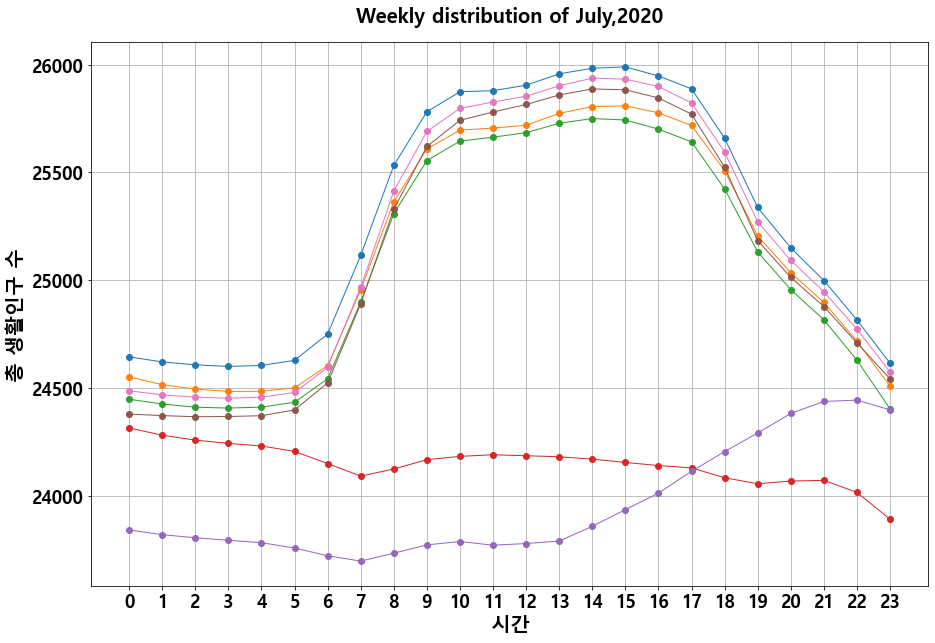

In [112]:
plt.figure(figsize=(15,10))
plt.title('Weekly distribution of July,2020', pad=20, fontweight='bold', fontsize = 20)     # 제목 설정
plt.plot(table, marker='o', linewidth=1)
plt.xticks(table.index, fontweight='bold', fontsize=18)     # x,y축 눈끔 설정
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('시간', fontweight='bold', fontsize = 20)     # x,y축 label 설정
plt.ylabel('총 생활인구 수', fontweight='bold', fontsize = 20)
plt.grid(True)     # 격자 표시